#TP Méthodes des différences temporelles -- SARSA et Q-Learning

## Frozen Lake

l'environnement Frozen Lake est un monde grille incertain dans lequel on part depuis un état initial (la case la plus en haut à gauche) pour aller à un état final (la case la plus basse à droite). L'environnement est incertain car vous marchez sur un lac gelé et l'épaisseur de glace varie. Vous pouvez donc tomber dans l'eau dans certaines cases. De plus, la glace est plus glissante à certains endroits, et donc faire un pas peut vous mener plus loin que prévu... et si le vent s'en mèle...

Au lieu d'essayer d'estimer le modèle de transition, on va utiliser SARSA et Q-learning pour résoudre ce problème.

Utilisez l'environnement Frozen Lake pour implémenter SARSA et Q-learning. Utilisez d'abord l'environnement avec une grille 4x4 pour tester vos algorithmes, puis vous devriez pouvoir les utiliser pour la grille 16x16.



## FrozenLake - familiarisation avec l'environnement

Evaluez une politique aléatoire. 

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import random
import gym
env = gym.make("FrozenLake8x8-v0",  is_slippery=True)
numStates = env.observation_space.n
numActions = env.action_space.n
print("Environnement avec", numStates, " états et ", numActions, " actions")
env.reset()
nbIt=0#nombre d'itération
rew=[]#reward list
done=False
while not done:
  observation, reward, done, info = env.step(np.random.randint(4))
  #env.render()
  nbIt+=1
  rew = rew+[reward]
print("Episode terminé après {} itérations".format(nbIt))
print("Récompenses obtenues:",rew)
env.close()

Environnement avec 64  états et  4  actions
Episode terminé après 10 itérations
Récompenses obtenues: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## SARSA

### $\epsilon$-greedy

Implémentez une fonction qui chosit une action avec la stratégie $\epsilon$-greedy:
* exploite avec un probabilité $1-\epsilon$: ici on choisit l'action avec la meilleure valeur de $q[s]$
* explore avec une probabilité $\epsilon$: on choisit une action de manière uniforme sur toute les actions.

### SARSA

Implémentez un fonction SARSA qui prend en paramètre
 * un nombre d'épisodes utilisés pour l'apprentissage
 * $\gamma$ le taux d'escompte
 * $\alpha$ le taux d'apprentissage (que l'on retrouve lors de la mise à jour des valeurs de Q)
 * $\epsilon$ le paramètre pour la méthode $\epsilon$-greedy.

Votre fonction doit au moins retourner la table $Q: S \times A$. Vous trouverez ci-dessous une fonction $plotQ$ qui génère une représentation de la table $Q$: pour chaque case sera dessiné la meilleure action selon $Q$ et la couleur représentera la valeur de cette action.
 
Pour visualiser les progrès faits pendant l'apprentissage, votre fonction SARSA peut également retourner une séquence de valeurs. Par exemple,
 * la séquence de récompenses (totale ou moyenne) obtenue sur chaque épisode de l'apprentissage
 * la valeur de la meilleure action pour l'état de départ à chaque fin d'épisode.
 * au lieu d'utiliser les valeurs obtenues lors de l'apprentissage, vous pouvez aussi effectuer périodiquement une évaluation de la politique courante (sans exploration). Pour ce faire, vous pouvez calculer la performance sur un petit nombre d'épisodes et retourner la moyenne. Cette méthode a l'avantage d'évaluer la politique sans exploration (donc une meilleure évaluation de la politique), mais peut coûter cher en temps de calcul suivant la fréquence d'exécution et le nombre d'épisodes utilisés pour l'évaluation.

En générant le graphique, vous devriez visualiser si l'algorithme est arrivé à améliorer les performances. Vous pouvez soit tracer directement la valeur de chaque épisode. Pour avoir une courbe un peu plus lisse, vous pouvez aussi calculer une moyenne sur une fenêtre de $k$ épisodes (la fonction $runningAvg$ effectue ce travail).

Notez qu'on considère Frozen lake comme résolu quand
 * il atteint le but dans 78% des épisodes pour la grille 4x4.
 * a priori, on peut atteindre 100% pour la grille 8x8

Quelques idées pour aider au debeug:
 * vous pouvez aussi regarder si la plupart des paires état-actions ont été exécutée. 
 * Vous pouvez choisir comme paramètres (le code que j'ai écrit a fonctionné avec ces paramètres, évidemment, vous pouvez essayer avec d'autres par la suite).
   * $\epsilon=0.2$
   * $\alpha=0.02$


In [61]:
# à implémenter




from random import uniform

def epsGreedy(env,epsilon, q):

    chosen_action=None#init
    outcome_greedy=uniform(0, 1)

    if outcome_greedy<=epsilon:
        index_max=np.argmax(q,axis=1)
        chosen_action=index_max[0]
    else:
        chosen_action=env.action_space.sample()
    return chosen_action

# A implémenter


numStates = env.observation_space.n
print(numStates)
def sarsa(nbr_episodes,gamma,alpha,epsilon):
    time_stamp=0
    q=np.zeros((numStates+1,numActions),dtype=float)
    for iteration in range(10000):#répète éternellement pour chaque épisode
      for episode in range (nbr_episodes):
        state=env.reset()
        chosen_action=epsGreedy(env,epsilon, q)
        print('chosen action from epsGreedy function',chosen_action)
        done=False
        while (not done):#pour chaque étape de l'épisode
          state_p,reward,done,_=env.step(chosen_action)
          chosen_action_p=epsGreedy(env,epsilon, q)
          state_p,reward,done,_=env.step(chosen_action_p)
          time_stamp=time_stamp+1
          #q[state][chosen_action]=q[state][chosen_action]+alpha*(reward+gamma*q[state_p][chosen_action_p]-q[state,chosen_action])
          q[state][chosen_action]=q[state][chosen_action]+alpha*(reward+gamma*np.max(q[state_p, :])-q[state,chosen_action])
          state=state_p
          chosen_action_p=chosen_action

    return q

q=sarsa(50,1,0.02,0.2)

print(q)
    #pi=np.zeros((numStates+1,numActions),dtype=float)








Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
chosen action from epsGreedy function 2
chosen action from epsGreedy function 3
chosen action from epsGreedy function 3
chosen action from epsGreedy function 3
chosen action from epsGreedy function 0
chosen action from epsGreedy function 3
chosen action from epsGreedy function 3
chosen action from epsGreedy function 3
chosen action from epsGreedy function 1
chosen action from epsGreedy function 1
chosen action from epsGreedy function 3
chosen action from epsGreedy function 3
chosen action from epsGreedy function 0
chosen action from epsGreedy function 1
chosen action from epsGreedy function 1
chosen action from epsGreedy function 3
chosen action from epsGreedy function 1
chosen action from epsGreedy function 1
chosen action from epsGreedy function 0
chosen action from epsGreedy function 2
chosen action from epsGreedy function 0
chosen action from epsGreedy function 0
chosen action from epsGreedy function 0
ch

(252,)


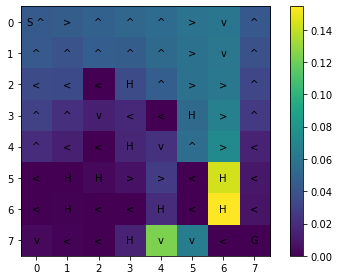

In [63]:

def runningAvg(data, windowSize):
  res = np.zeros(len(data)-windowSize)
  sum=0
  for i in range(windowSize):
    sum += data[i]
  for i in range(len(data)-windowSize):
    res[i]= sum/windowSize
    sum -= data[i]
    sum += data[i+windowSize]
  return res


res=runningAvg(q.flatten(), 8)
print(res.shape)
# visualisation de la table Q pour FrozenLake 4x4 et 8x8
# passez la taille (4 ou 8) en paramètres
def plotQ(q_table, map_size):
  if (map_size==4):
    MAP = [
        "SFFF",
        "FHFH",
        "FFFF",
        "HFFG"
    ]
  else:
    MAP=[
        "SFFFFFFF",
        "FFFFFFFF",
        "FFFHFFFF",
        "FFFFFHFF",
        "FFFHFFFF",
        "FHHFFFHF",
        "FHFFHFHF",
        "FFFHFFFG"
    ]
  best_value = np.max(q_table, axis = 1).reshape((map_size,map_size))
  best_policy = np.argmax(q_table, axis = 1).reshape((map_size,map_size))
    
  fig, ax = plt.subplots()
  im = ax.imshow(best_value)

  for i in range(best_value.shape[0]):#itère sur les états
      for j in range(best_value.shape[1]):#itère sur les actionsd
          if MAP[i][j] in 'GH':
              arrow = MAP[i][j]
          elif best_policy[i, j] == 0:
              arrow = '<'
          elif best_policy[i, j] == 1:
              arrow = 'v'
          elif best_policy[i, j] == 2:
              arrow = '>'
          elif best_policy[i, j] == 3:
              arrow = '^'
          if MAP[i][j] in 'S':
              arrow = 'S ' + arrow
          text = ax.text(j, i, arrow, ha = "center", va = "center",
                         color = "black")
            
  cbar = ax.figure.colorbar(im, ax = ax)
    
  fig.tight_layout()
  plt.show() 


plotQ(q[1:],8 )


## Q-learning
Implémentez l'algorithme Q-learning (en partant de SARSA, il ne devrait y avoir que quelques lignes de codes à modidier!)



In [64]:

from random import uniform

def epsGreedy(env,epsilon, q):

    chosen_action=None#init
    outcome_greedy=uniform(0, 1)

    if outcome_greedy<=epsilon:
        index_max=np.argmax(q,axis=1)
        chosen_action=index_max[0]
    else:
        chosen_action=env.action_space.sample()
    return chosen_action

# A implémenter


numStates = env.observation_space.n
print(numStates)
def sarsa(nbr_episodes,gamma,alpha,epsilon):
    time_stamp=0
    q=np.zeros((numStates+1,numActions),dtype=float)
    for iteration in range(1000):#répète éternellement pour chaque épisode
      for episode in range (nbr_episodes):
        chosen_action=epsGreedy(env,epsilon, q)
        state=env.reset()
        done=False
        while (not done):#pour chaque étape de l'épisode
          state_p,reward,done,_=env.step(chosen_action)
          chosen_action_p=epsGreedy(env,epsilon, q)
          state_p,reward,done,_=env.step(chosen_action_p)
          time_stamp=time_stamp+1
          action_p_p=np.argmax(q,axis=1)

          q[state][chosen_action]=q[state][chosen_action]+alpha*(reward+gamma*q[state_p][action_p_p[0]]-q[state][chosen_action])
          state=state_p
          chosen_action_p=chosen_action

    return q

q=sarsa(50,0.8,0.02,0.2)

print(q)


64
[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.      

## Comparaison

Comparer les politiques trouvées à l'aide de SARSA, Q-learning, et vous devriez aussi pouvoir utiliser le code de l'algorithme on policy Monte Carlo du TD précédent.

Avant convergence à l'optimal, on observe souvent que SARSA a choisi une politique moins risquée avant de tomber sur l'optimal pour le FrozenLake8x8.

## Cart-pole en tabulaire

On vous propose pour finir d'utiliser votre code et de tester l'apprentissage sur le problème du cart-pole. A priori, c'est un problème où les états sont des variables continues. On vous propose ici de discrétiser les variables et d'essayer d'utiliser une des méthodes pour voir vos résultats. 

La récompense que vous obtenez est le nombre de pas de temps où le baton est resté en équilibre. Si vous utilisez colab pour coder, vous ne pourrez malheureusement pas visualiser un épisode avec la méthode render :-(

Cet environnement Cart-Pole consiste à déplacer un chariot pour faire tenir en équilibre une poutre. Plus précisément:
* Il y a deux actions : gauche et droite (représentées par 0 et 1).
* L'observation reçue (c'est à dire l'état) est un tableau numpy comprenant 4 variables: la position du chariot, la vélocité, l'angle à la verticale et la position du haut de la poutre.
* L'épisode se termine lorsque l'angle de la poutre à la verticale dépasse 12 degrés.
* Les récompenses reçues sont égales à 1 sauf si l'angle dépasse 12 degrés.

On vous donne ci-dessous les fonctions pour réaliser la discrétisation et pour encoder l'état en un entier.


In [50]:
env = gym.make("CartPole-v1")
print("environnement avec ", env.action_space.n, " actions")
print("l'espace des états est lui codé avec une class", env.observation_space,
      " qui représente un espace continu")
print("les bornes inférieures des intervalles sont: ", env.observation_space.low)
print("les bornes supérieures des intervalles sont: ",env.observation_space.high)
env.reset()
nbIt=0
done=False
while not done:
  observation, reward, done, info = env.step(np.random.randint(2))
  nbIt+=1
print("Episode terminé après {} itérations".format(nbIt))
env.close()

environnement avec  2  actions
l'espace des états est lui codé avec une class Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)  qui représente un espace continu
les bornes inférieures des intervalles sont:  [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
les bornes supérieures des intervalles sont:  [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
Episode terminé après 17 itérations


In [51]:
def discretise(x,mini,maxi): 
  # discretise x
  # renvoie un entier entre 0 et nval-1
  if x<mini: x=mini
  if x>maxi: x=maxi
  return int(np.floor((x-mini)*nval/(maxi-mini+0.0001)))

def encode(observation):
  pos = discretise(observation[0],mini=-1,maxi=1)
  vel = discretise(observation[1],mini=-1,maxi=1)
  angle = discretise(observation[2],mini=-1,maxi=1)
  pos2 = discretise(observation[3],mini=-1,maxi=1)
  return pos + vel*nval + angle*nval*nval + pos2*nval*nval*nval
  

In [52]:
nval =5 # nombre de valeurs discrètes qu’une variable peut prendre
N= nval ** 4 # Puisqu’il y a 4 variables, la taille de l’espace est nval^4
print("Le nombre d'états sera ici de ", N)

Le nombre d'états sera ici de  625


Modifiez votre implémentation de Q-learning et/ou de SARSA pour tester si vous pouvez apprendre à maintenier le baton en équilibre. Une modification sera d'utilisé les fonctions ci-dessus pour encoder/decoder un état. Une autre sera surement d'ajouter le nombre d'états en paramètre car ce nombre est maintenant indépendant de l'environnement! 
Avec comme paramètre $\epsilon=0.1$, $\alpha=0.2$ et $\gamma=0.9$, j'arrive a atteindre un score autour de 90 pas de temps.

In [ ]:
# à implémenter et tester